In [175]:

### 1. READING AND UNDERSTANDING THE DATA #####

#importing necessary library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score


In [13]:
#read the datadf = pd.read_csv('day .csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
df.shape

(730, 16)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [17]:
#Columns like instant and dteday may not add value to the model and can be removed.
df = df.drop(['instant', 'dteday'], axis=1)

In [18]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# holiday and working day are predicting the same , i am removing working day column from the data frame
df = df.drop(['workingday'], axis=1)

In [25]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


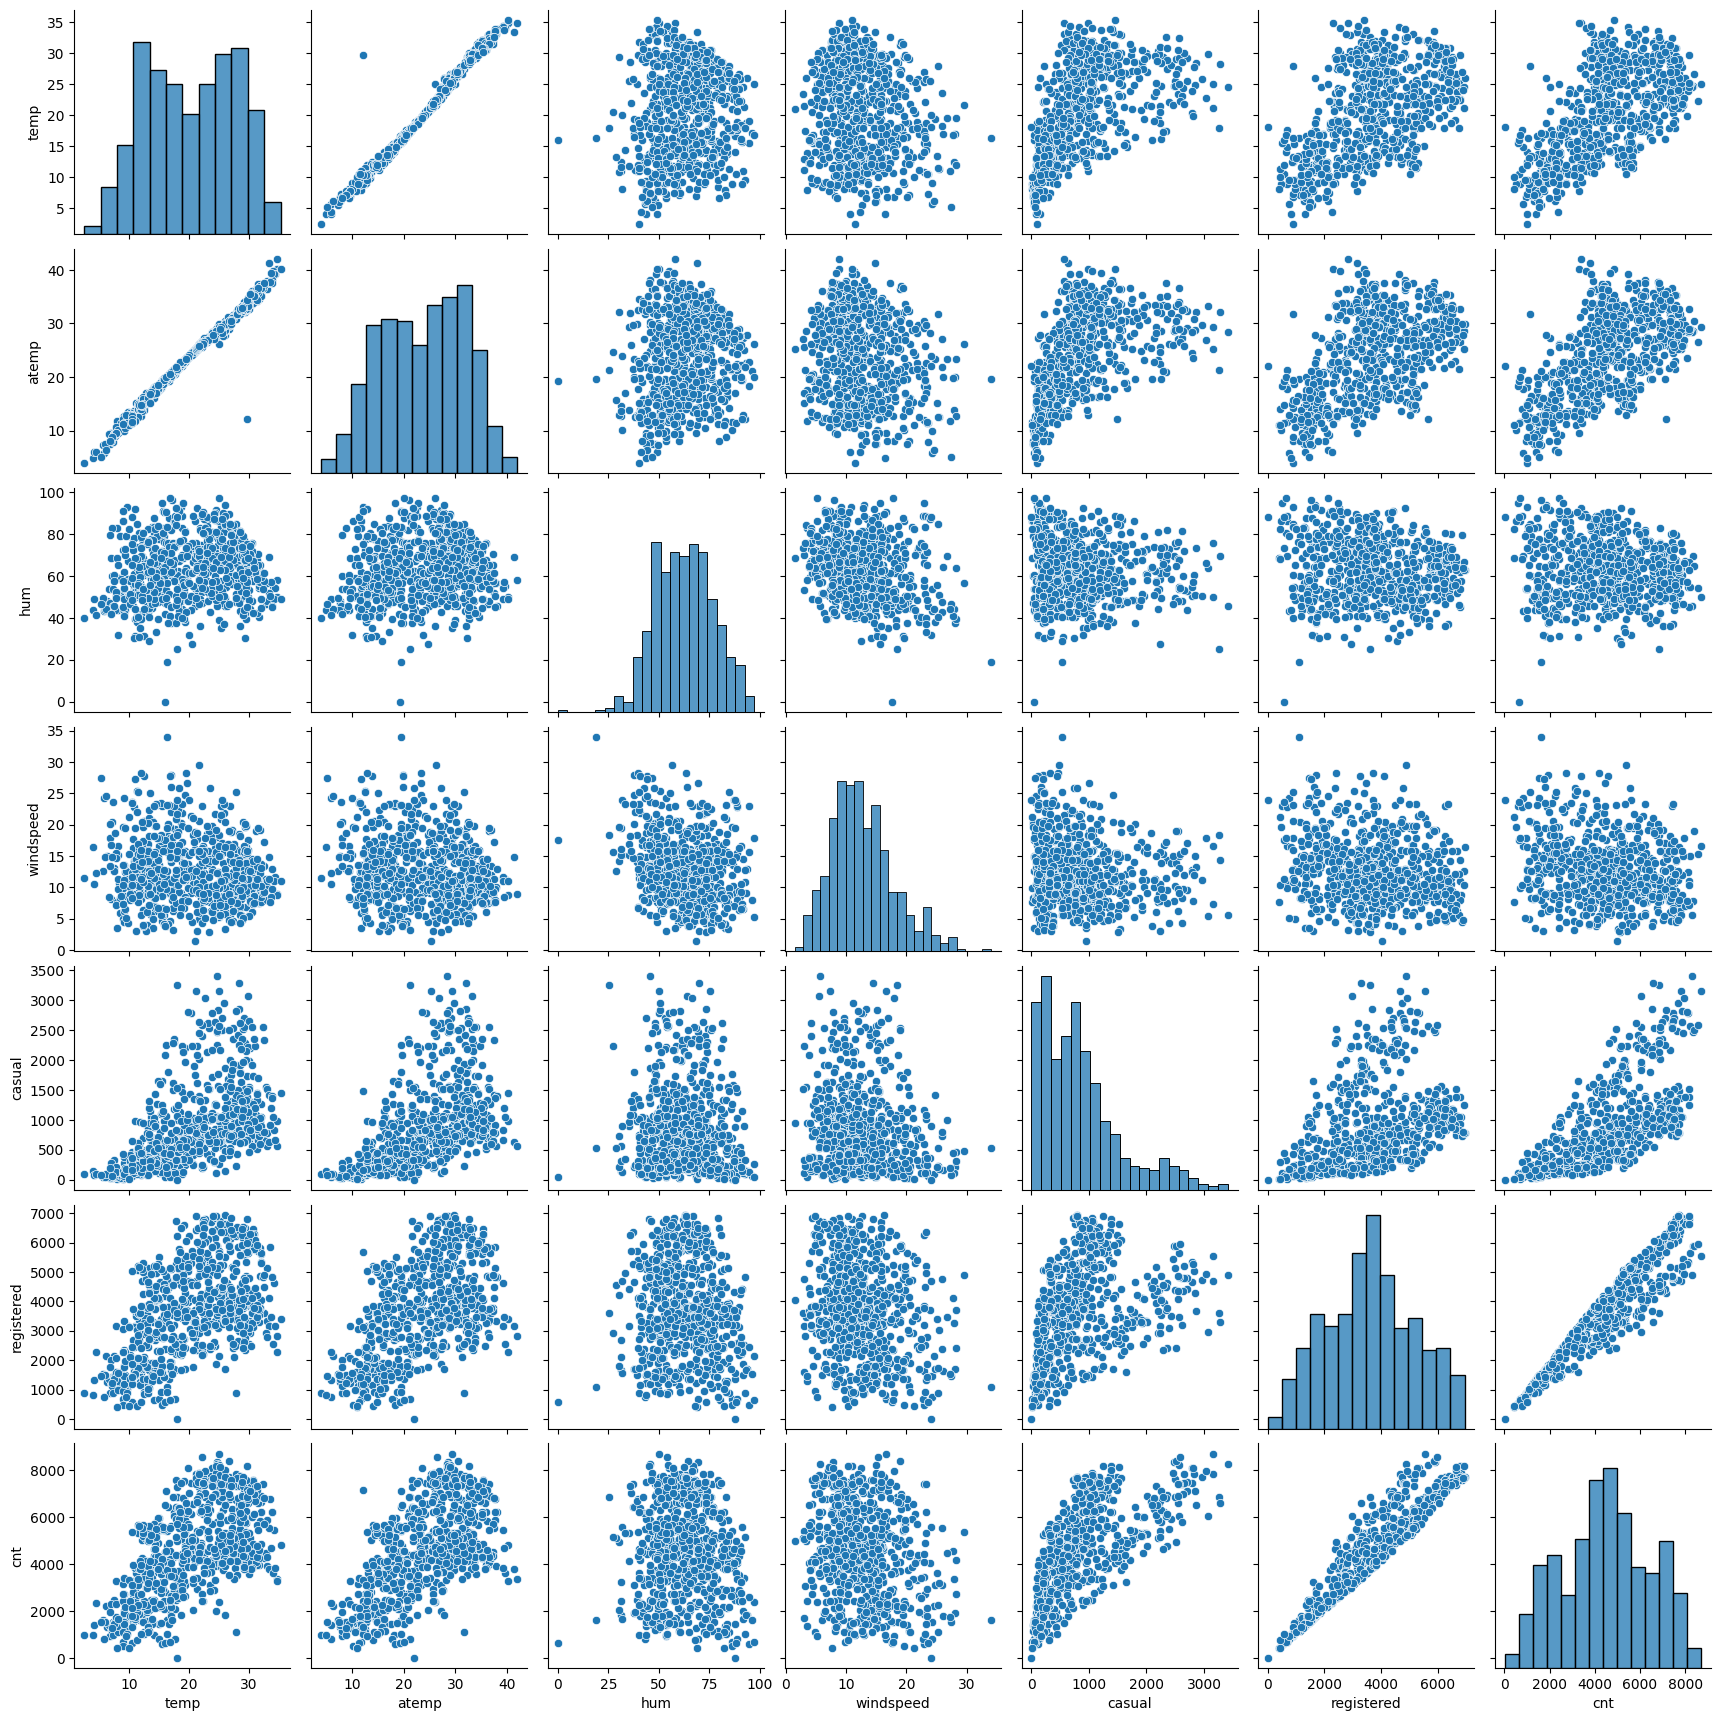

In [46]:
# visualization of Numerical variables

# Select the columns of interest for the pair plot
columns_num = [ 'temp','atemp','hum','windspeed','casual','registered','cnt']
df_num = df[columns_num]

# Plot pair plot
sns.pairplot(df_num)
plt.show()


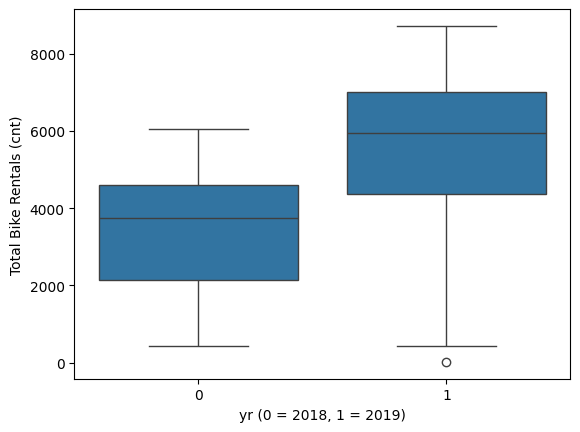

In [40]:
# visualization of categorical  variables
sns.boxplot(x='yr', y='cnt', data =df)
plt.xlabel("yr (0 = 2018, 1 = 2019)")
plt.ylabel("Total Bike Rentals (cnt)")
plt.show()

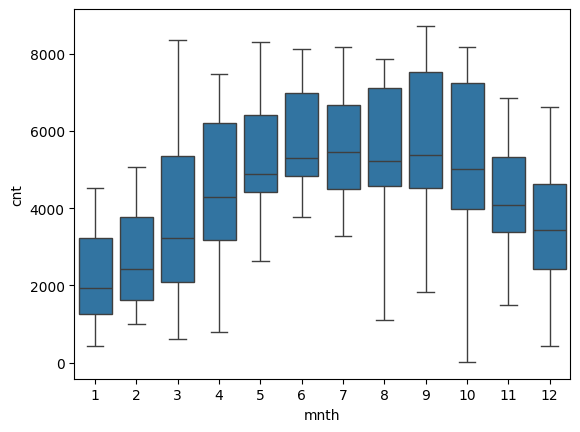

In [41]:
# Plot scatter plot using seaborn
sns.boxplot(x='mnth', y='cnt', data =df)
plt.show()

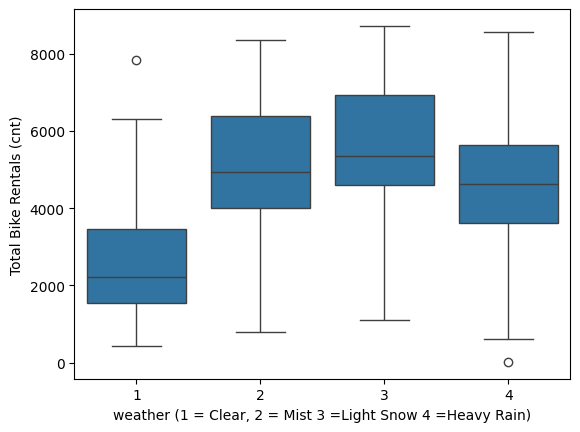

In [42]:
sns.boxplot(x='season', y='cnt', data =df)
plt.xlabel("weather (1 = Clear, 2 = Mist 3 =Light Snow 4 =Heavy Rain)")
plt.ylabel("Total Bike Rentals (cnt)")
plt.show()

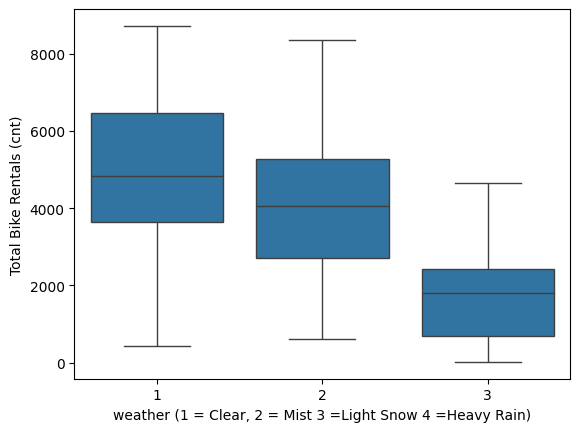

In [43]:
sns.boxplot(x='weathersit', y='cnt', data =df)
plt.xlabel("weather (1 = Clear, 2 = Mist 3 =Light Snow 4 =Heavy Rain)")
plt.ylabel("Total Bike Rentals (cnt)")
plt.show()

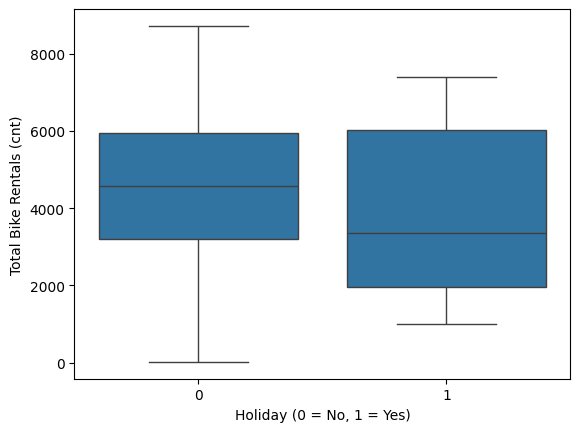

In [44]:
sns.boxplot(x='holiday', y='cnt', data =df)
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Total Bike Rentals (cnt)")
plt.show()

In [47]:
### 1. PREPARING THE DATA OF MODELING #####

### yes or no already converted into binary in data frame
### create dummy variables for mnth, weekday, weathersit and season

In [54]:
# Create dummy variables
df1 = pd.get_dummies(df, columns=['mnth', 'weekday', 'weathersit', 'season'], drop_first=True)
df1.head()

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,False,...,False,False,False,False,True,True,False,False,False,False
1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,False,...,False,False,False,False,False,True,False,False,False,False
2,0,0,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,8.200000,10.60610,59.0435,10.739832,108,1454,1562,False,...,True,False,False,False,False,False,False,False,False,False
4,0,0,9.305237,11.46350,43.6957,12.522300,82,1518,1600,False,...,False,True,False,False,False,False,False,False,False,False


In [56]:
# Convert all boolean columns to integers (0 and 1)
bool_cols = df1.select_dtypes(include='bool').columns
df1[bool_cols] = df1[bool_cols].astype(int)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   temp          730 non-null    float64
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   casual        730 non-null    int64  
 7   registered    730 non-null    int64  
 8   cnt           730 non-null    int64  
 9   mnth_2        730 non-null    int64  
 10  mnth_3        730 non-null    int64  
 11  mnth_4        730 non-null    int64  
 12  mnth_5        730 non-null    int64  
 13  mnth_6        730 non-null    int64  
 14  mnth_7        730 non-null    int64  
 15  mnth_8        730 non-null    int64  
 16  mnth_9        730 non-null    int64  
 17  mnth_10       730 non-null    int64  
 18  mnth_11       730 non-null    

In [61]:
df1.head()

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,...,0,1,0,0,0,0,0,0,0,0


In [63]:

# SPLITTING INTO TRAIN AND TEST



In [64]:
df_train, df_test = train_test_split(df1, train_size = 0.7, random_state =100)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [65]:


#### RESCALING OF VARIABLE ######

# using NORMALIZATION for rescaling



In [68]:
# a. instantiate an object
scaler = MinMaxScaler()

In [71]:
# b. Fit on Data
# create the list of numeric variable
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [73]:
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
576,1,0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,0,...,0,0,0,0,1,1,0,0,0,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,0,1,1,0,1,0,0
111,0,0,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,...,0,0,0,1,0,1,0,1,0,0


In [74]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:



#### TRAINING THE MODEL ######




<function matplotlib.pyplot.show(close=None, block=None)>

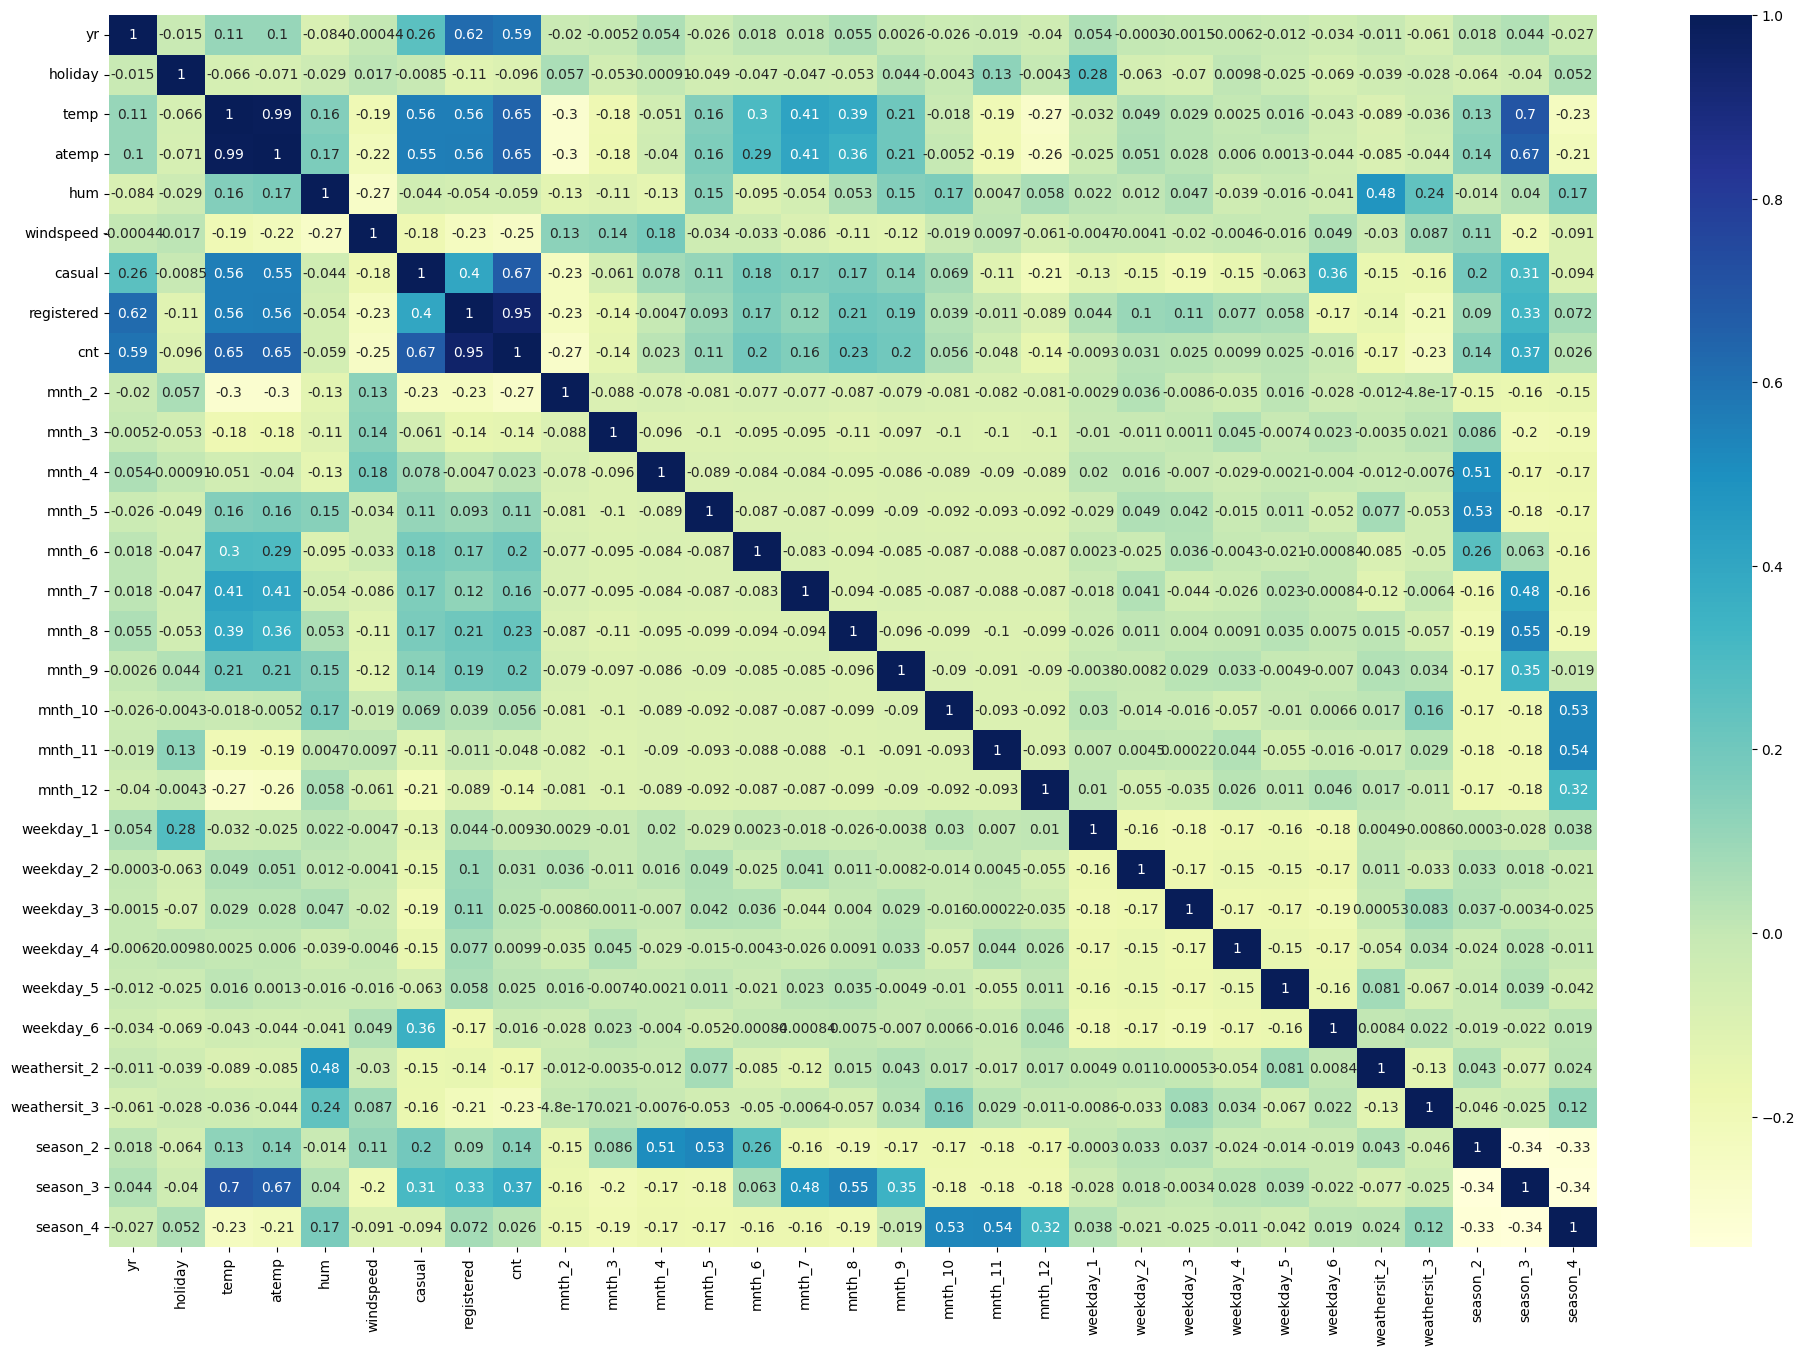

In [79]:
# heatmap
plt.figure(figsize =(24,16))
sns.heatmap(df_train.corr(), annot =True, cmap="YlGnBu")
plt.show

In [81]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [82]:
X_train.head()

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,mnth_2,mnth_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
576,1,0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0,0,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0,1,...,0,0,0,0,1,1,0,0,0,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0,0,...,0,0,0,0,1,1,0,1,0,0
111,0,0,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0,0,...,0,0,0,1,0,1,0,1,0,0


In [83]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [122]:
# Adding All the variables to the model
X_train_sm = sm.add_constant(X_train)

# create the first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# params
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.859e+29
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:31:31   Log-Likelihood:                 16763.
No. Observations:                 510   AIC:                        -3.346e+04
Df Residuals:                     479   BIC:                        -3.333e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.527e-16   4.76e-16     -0.321      0.749   -1.09e-15    7.83e-16
yr            3.539e-16   2.12e-16      1.668      0.096   -6.29e-17    7.71e-16
holiday      -9.714e-17   4.26e-16     -0.228      0.820   -9.34e-16     7.4e-16
temp         -1.166e-15   2.15e-15     -0.542      0.588    -5.4e-15    3.06e-15
atemp         9.437e-16   2.07e-15      0.455      0.649   -3.13e-15    5.02e-15
hum           9.437e-16   5.87e-16      1.608      0.109    -2.1e-16     2.1e-15
windspeed     4.718e-16   4.15e-16      1.136      0.257   -3.44e-16    1.29e-15
casual           0.3775   6.04e-16   6.25e+14      0.000       0.377       0.377
registered       0.7968   7.18e-16   1.11e+15      0.000       0.797       0.797
mnth_2        3.469e-17    3.1e-16      0.112      0.911   -5.75e-16    6.44e-16
mnth_3       -2.359e-16   3.38e-16     -0.698      0.486      -9e-16    4.28e-16
mnth_4         4.51e-17   5.05e-16      0.089      0.929   -9.47e-16    1.04e-15
mnth_5       -1.804e-16   5.46e-16     -0.330      0.741   -1.25e-15    8.92e-16
mnth_6        2.914e-16   5.85e-16      0.499      0.618   -8.57e-16    1.44e-15
mnth_7        1.665e-16   6.58e-16      0.253      0.800   -1.13e-15    1.46e-15
mnth_8         2.22e-16    6.3e-16      0.353      0.724   -1.02e-15    1.46e-15
mnth_9       -9.714e-17   5.69e-16     -0.171      0.865   -1.22e-15    1.02e-15
mnth_10       2.498e-16   5.21e-16      0.480      0.632   -7.74e-16    1.27e-15
mnth_11       3.886e-16   4.93e-16      0.789      0.431   -5.79e-16    1.36e-15
mnth_12      -1.388e-16   3.97e-16     -0.349      0.727    -9.2e-16    6.42e-16
weekday_1     2.637e-16      3e-16      0.880      0.379   -3.25e-16    8.53e-16
weekday_2       3.4e-16   3.12e-16      1.090      0.276   -2.73e-16    9.53e-16
weekday_3     2.637e-16   3.12e-16      0.845      0.399    -3.5e-16    8.77e-16
weekday_4      1.11e-16   3.11e-16      0.357      0.721      -5e-16    7.22e-16
weekday_5      2.29e-16   2.95e-16      0.776      0.438   -3.51e-16    8.09e-16
weekday_6     1.284e-16   2.21e-16      0.582      0.561   -3.05e-16    5.62e-16
weathersit_2  1.561e-17   1.62e-16      0.097      0.923   -3.02e-16    3.33e-16
weathersit_3 -1.735e-16   4.35e-16     -0.399      0.690   -1.03e-15    6.81e-16
season_2      9.021e-17   3.59e-16      0.251      0.802   -6.15e-16    7.95e-16
season_3      3.192e-16   4.51e-16      0.708      0.479   -5.67e-16     1.2e-15
season_4     -6.939e-17   4.11e-16     -0.169      0.866   -8.77e-16    7.38e-16
==============================================================================
Omnibus:                        4.343   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.396
Skew:                           0.224   Prob(JB):                        0.111
Kurtosis:    

In [123]:
# by considering below 
# significance (p-values)
# VIF

In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,455.60
3,atemp,384.29
7,registered,48.24
4,hum,21.17
28,season_3,15.48
29,season_4,12.09
14,mnth_8,11.04
6,casual,10.72
13,mnth_7,9.56
27,season_2,9.16


In [125]:
 x = X_train.drop(['weathersit_2','mnth_4','mnth_2'], axis =1 )

In [126]:
# Adding All the variables to the model
X_train_sm = sm.add_constant(x)

# create the first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.011e+30
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:31:35   Log-Likelihood:                 16922.
No. Observations:                 510   AIC:                        -3.379e+04
Df Residuals:                     482   BIC:                        -3.367e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.494e-16   3.28e-16      2.283      0.023    1.04e-16    1.39e-15
yr            1.943e-16    1.5e-16      1.297      0.195      -1e-16    4.89e-16
holiday       5.135e-16    3.1e-16      1.657      0.098   -9.54e-17    1.12e-15
temp          -1.61e-15   1.56e-15     -1.029      0.304   -4.68e-15    1.46e-15
atemp         3.331e-16   1.52e-15      0.220      0.826   -2.64e-15    3.31e-15
hum           3.331e-16   3.69e-16      0.903      0.367   -3.91e-16    1.06e-15
windspeed    -1.665e-16   3.01e-16     -0.554      0.580   -7.57e-16    4.24e-16
casual           0.3775    4.4e-16   8.59e+14      0.000       0.377       0.377
registered       0.7968    5.1e-16   1.56e+15      0.000       0.797       0.797
mnth_3        1.457e-16   1.69e-16      0.860      0.390   -1.87e-16    4.79e-16
mnth_5        5.551e-17   2.27e-16      0.244      0.807   -3.91e-16    5.02e-16
mnth_6        3.747e-16   2.69e-16      1.391      0.165   -1.54e-16    9.04e-16
mnth_7        3.608e-16   3.74e-16      0.964      0.336   -3.75e-16     1.1e-15
mnth_8        4.441e-16   3.58e-16      1.240      0.215   -2.59e-16    1.15e-15
mnth_9        1.527e-16   3.28e-16      0.466      0.642   -4.92e-16    7.97e-16
mnth_10       3.608e-16   3.34e-16      1.081      0.280   -2.95e-16    1.02e-15
mnth_11       1.943e-16   3.23e-16      0.601      0.548   -4.41e-16    8.29e-16
mnth_12       2.082e-16   2.58e-16      0.808      0.420   -2.98e-16    7.15e-16
weekday_1     3.192e-16   2.18e-16      1.465      0.144   -1.09e-16    7.47e-16
weekday_2     1.388e-16   2.27e-16      0.611      0.541   -3.07e-16    5.85e-16
weekday_3     8.327e-17   2.27e-16      0.368      0.713   -3.62e-16    5.28e-16
weekday_4     3.886e-16   2.26e-16      1.720      0.086   -5.52e-17    8.32e-16
weekday_5     1.665e-16   2.13e-16      0.782      0.435   -2.52e-16    5.85e-16
weekday_6     2.151e-16    1.6e-16      1.345      0.179   -9.91e-17    5.29e-16
weathersit_3  1.874e-16   2.91e-16      0.643      0.521   -3.85e-16     7.6e-16
season_2     -3.261e-16   1.77e-16     -1.840      0.066   -6.74e-16    2.22e-17
season_3      4.927e-16   3.06e-16      1.608      0.109   -1.09e-16    1.09e-15
season_4      2.776e-17   2.94e-16      0.094      0.925    -5.5e-16    6.06e-16
==============================================================================
Omnibus:                       11.416   Durbin-Watson:                   0.317
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.767
Skew:                           0.356   Prob(JB):                      0.00278
Kurtosis:                       2.787   Cond. No.                         89.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [127]:
### removing high p-values low VIF
x1 = x.drop(['season_4','mnth_9','mnth_5','weekday_3','atemp'], axis =1 )

In [128]:
# Adding All the variables to the model
X_train_sm = sm.add_constant(x1)

# create the first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.839e+30
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:31:46   Log-Likelihood:                 17389.
No. Observations:                 510   AIC:                        -3.473e+04
Df Residuals:                     487   BIC:                        -3.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.163e-17   1.23e-16     -0.338      0.736   -2.84e-16       2e-16
yr           -8.327e-17   5.38e-17     -1.548      0.122   -1.89e-16    2.24e-17
holiday       3.747e-16   1.19e-16      3.139      0.002     1.4e-16    6.09e-16
temp         -6.523e-16   1.95e-16     -3.351      0.001   -1.03e-15    -2.7e-16
hum           5.274e-16   1.44e-16      3.664      0.000    2.45e-16     8.1e-16
windspeed     3.192e-16   1.17e-16      2.734      0.006    8.98e-17    5.49e-16
casual           0.3775   1.38e-16   2.74e+15      0.000       0.377       0.377
registered       0.7968   1.58e-16   5.04e+15      0.000       0.797       0.797
mnth_3       -9.021e-17    6.3e-17     -1.432      0.153   -2.14e-16    3.36e-17
mnth_6        3.816e-17   7.84e-17      0.487      0.627   -1.16e-16    1.92e-16
mnth_7        2.776e-17   9.55e-17      0.291      0.771    -1.6e-16    2.15e-16
mnth_8        9.021e-17   8.55e-17      1.055      0.292   -7.79e-17    2.58e-16
mnth_10       1.735e-16   8.17e-17      2.122      0.034    1.29e-17    3.34e-16
mnth_11      -1.058e-16   7.44e-17     -1.422      0.156   -2.52e-16    4.04e-17
mnth_12       6.939e-18   7.32e-17      0.095      0.924   -1.37e-16    1.51e-16
weekday_1    -4.857e-17   5.84e-17     -0.831      0.406   -1.63e-16    6.62e-17
weekday_2    -1.943e-16      6e-17     -3.240      0.001   -3.12e-16   -7.65e-17
weekday_4    -2.064e-16   5.95e-17     -3.467      0.001   -3.23e-16   -8.94e-17
weekday_5    -1.752e-16   5.88e-17     -2.978      0.003   -2.91e-16   -5.96e-17
weekday_6    -1.301e-16   5.87e-17     -2.218      0.027   -2.45e-16   -1.49e-17
weathersit_3  5.065e-16   1.13e-16      4.482      0.000    2.84e-16    7.29e-16
season_2     -6.939e-17    6.4e-17     -1.084      0.279   -1.95e-16    5.63e-17
season_3      2.359e-16   9.17e-17      2.574      0.010    5.58e-17    4.16e-16
==============================================================================
Omnibus:                       43.526   Durbin-Watson:                   0.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.006
Skew:                          -0.706   Prob(JB):                     1.87e-12
Kurtosis:                       3.742   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
vif = pd.DataFrame()
vif['Features'] = x1.columns
vif['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,44.12
6,registered,24.91
3,hum,13.38
21,season_3,7.52
5,casual,6.84
0,yr,4.90
4,windspeed,4.02
20,season_2,3.44
10,mnth_8,2.41
9,mnth_7,2.37


In [130]:
 x2 = x1.drop(['mnth_6','mnth_12','mnth_7'], axis =1 )

In [131]:
# Adding All the variables to the model
X_train_sm = sm.add_constant(x2)

# create the first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.849e+30
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:34:10   Log-Likelihood:                 17092.
No. Observations:                 510   AIC:                        -3.414e+04
Df Residuals:                     490   BIC:                        -3.406e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.192e-16   2.18e-16      1.464      0.144   -1.09e-16    7.48e-16
yr            6.939e-17   9.31e-17      0.745      0.457   -1.14e-16    2.52e-16
holiday      -2.859e-15   2.12e-16    -13.515      0.000   -3.27e-15   -2.44e-15
temp          1.388e-17   3.06e-16      0.045      0.964   -5.87e-16    6.15e-16
hum          -8.604e-16   2.43e-16     -3.541      0.000   -1.34e-15   -3.83e-16
windspeed     3.331e-16   2.07e-16      1.611      0.108   -7.31e-17    7.39e-16
casual           0.3775   2.44e-16   1.55e+15      0.000       0.377       0.377
registered       0.7968   2.67e-16   2.98e+15      0.000       0.797       0.797
mnth_3       -2.776e-17   1.09e-16     -0.255      0.799   -2.42e-16    1.87e-16
mnth_8       -2.429e-16   1.24e-16     -1.958      0.051   -4.87e-16    8.59e-19
mnth_10       4.094e-16   1.37e-16      2.979      0.003    1.39e-16    6.79e-16
mnth_11       3.608e-16   1.24e-16      2.899      0.004    1.16e-16    6.05e-16
weekday_1     4.857e-16   1.04e-16      4.660      0.000    2.81e-16    6.91e-16
weekday_2    -2.429e-16   1.07e-16     -2.278      0.023   -4.52e-16   -3.34e-17
weekday_4     5.898e-17   1.06e-16      0.555      0.579    -1.5e-16    2.68e-16
weekday_5    -6.418e-17   1.05e-16     -0.612      0.541    -2.7e-16    1.42e-16
weekday_6     3.764e-16   1.04e-16      3.608      0.000    1.71e-16    5.81e-16
weathersit_3 -1.804e-16   2.01e-16     -0.897      0.370   -5.76e-16    2.15e-16
season_2      1.527e-16   1.07e-16      1.421      0.156   -5.85e-17    3.64e-16
season_3      5.829e-16   1.51e-16      3.866      0.000    2.87e-16    8.79e-16
==============================================================================
Omnibus:                      250.727   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1695.831
Skew:                           2.057   Prob(JB):                         0.00
Kurtosis:                      10.929   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,34.24
6,registered,22.24
3,hum,11.06
5,casual,6.76
18,season_3,6.39
0,yr,4.62
4,windspeed,4.00
17,season_2,3.02
15,weekday_6,1.77
11,weekday_1,1.75


In [133]:
 x3 = x2.drop(['temp','mnth_3'], axis =1 )

In [134]:
# Adding All the variables to the model
X_train_sm = sm.add_constant(x3)

# create the first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.469e+30
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:38:38   Log-Likelihood:                 17177.
No. Observations:                 510   AIC:                        -3.432e+04
Df Residuals:                     492   BIC:                        -3.424e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.804e-16   1.83e-16     -0.987      0.324    -5.4e-16    1.79e-16
yr            3.955e-16   7.41e-17      5.335      0.000     2.5e-16    5.41e-16
holiday       5.551e-17   1.78e-16      0.312      0.755   -2.94e-16    4.05e-16
hum            1.61e-15   1.96e-16      8.198      0.000    1.22e-15       2e-15
windspeed    -1.804e-15   1.72e-16    -10.505      0.000   -2.14e-15   -1.47e-15
casual           0.3775   1.91e-16   1.97e+15      0.000       0.377       0.377
registered       0.7968      2e-16   3.98e+15      0.000       0.797       0.797
mnth_8        2.776e-16   1.05e-16      2.651      0.008    7.18e-17    4.83e-16
mnth_10      -5.482e-16   1.14e-16     -4.817      0.000   -7.72e-16   -3.25e-16
mnth_11      -1.908e-16   1.04e-16     -1.840      0.066   -3.95e-16    1.29e-17
weekday_1     2.186e-16   8.79e-17      2.488      0.013    4.59e-17    3.91e-16
weekday_2     1.284e-16   8.98e-17      1.429      0.154   -4.81e-17    3.05e-16
weekday_4     8.327e-17   8.93e-17      0.932      0.352   -9.23e-17    2.59e-16
weekday_5     1.683e-16   8.85e-17      1.902      0.058   -5.54e-18    3.42e-16
weekday_6     3.036e-16   8.76e-17      3.467      0.001    1.32e-16    4.76e-16
weathersit_3  7.008e-16   1.69e-16      4.156      0.000     3.7e-16    1.03e-15
season_2     -1.908e-16   8.38e-17     -2.278      0.023   -3.55e-16   -2.62e-17
season_3     -3.816e-16   9.76e-17     -3.910      0.000   -5.73e-16    -1.9e-16
==============================================================================
Omnibus:                        1.030   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.841
Skew:                          -0.076   Prob(JB):                        0.657
Kurtosis:                       3.128   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
vif = pd.DataFrame()
vif['Features'] = x3.columns
vif['VIF'] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,registered,16.89
2,hum,8.54
4,casual,5.77
0,yr,4.08
16,season_3,3.73
3,windspeed,3.70
15,season_2,2.57
13,weekday_6,1.76
9,weekday_1,1.74
7,mnth_10,1.60


In [141]:
 x4 = x3.drop(['holiday','weekday_4'], axis =1 )

In [142]:
# Adding All the variables to the model
X_train_sm = sm.add_constant(x4)

# create the first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.871e+30
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:41:55   Log-Likelihood:                 17032.
No. Observations:                 510   AIC:                        -3.403e+04
Df Residuals:                     494   BIC:                        -3.396e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.441e-16   2.39e-16      1.854      0.064   -2.65e-17    9.15e-16
yr            6.939e-17   9.77e-17      0.710      0.478   -1.23e-16    2.61e-16
hum           2.776e-16    2.6e-16      1.066      0.287   -2.34e-16    7.89e-16
windspeed     5.551e-16   2.28e-16      2.434      0.015    1.07e-16       1e-15
casual           0.3775   2.43e-16   1.55e+15      0.000       0.377       0.377
registered       0.7968   2.55e-16   3.12e+15      0.000       0.797       0.797
mnth_8       -2.776e-17   1.39e-16     -0.200      0.842   -3.01e-16    2.45e-16
mnth_10      -9.714e-17   1.51e-16     -0.643      0.520   -3.94e-16       2e-16
mnth_11      -2.342e-16   1.36e-16     -1.716      0.087   -5.02e-16    3.39e-17
weekday_1     7.806e-17   1.03e-16      0.754      0.451   -1.25e-16    2.81e-16
weekday_2     3.539e-16   1.11e-16      3.195      0.001    1.36e-16    5.71e-16
weekday_5     1.978e-16    1.1e-16      1.796      0.073   -1.86e-17    4.14e-16
weekday_6     1.457e-16   1.14e-16      1.278      0.202   -7.82e-17     3.7e-16
weathersit_3  3.331e-16   2.24e-16      1.490      0.137   -1.06e-16    7.72e-16
season_2      1.631e-16   1.11e-16      1.467      0.143   -5.53e-17    3.81e-16
season_3      2.637e-16    1.3e-16      2.036      0.042    9.16e-18    5.18e-16
==============================================================================
Omnibus:                        3.382   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                3.780
Skew:                          -0.054   Prob(JB):                        0.151
Kurtosis:                       3.407   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
vif = pd.DataFrame()
vif['Features'] = x4.columns
vif['VIF'] = [variance_inflation_factor(x4.values, i) for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,registered,14.98
1,hum,8.38
3,casual,5.33
0,yr,4.00
14,season_3,3.73
2,windspeed,3.65
13,season_2,2.56
11,weekday_6,1.70
6,mnth_10,1.60
5,mnth_8,1.59


In [144]:
 x5 = x4.drop(['mnth_8','mnth_10','yr','weekday_1'], axis =1 )

In [145]:
# Adding All the variables to the model
X_train_sm = sm.add_constant(x5)

# create the first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.166e+31
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:44:14   Log-Likelihood:                 17563.
No. Observations:                 510   AIC:                        -3.510e+04
Df Residuals:                     498   BIC:                        -3.505e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.527e-16   8.15e-17      1.873      0.062   -7.51e-18    3.13e-16
hum          -5.274e-16   8.97e-17     -5.882      0.000   -7.04e-16   -3.51e-16
windspeed     7.078e-16   7.83e-17      9.042      0.000    5.54e-16    8.62e-16
casual           0.3775   8.06e-17   4.68e+15      0.000       0.377       0.377
registered       0.7968   6.58e-17   1.21e+16      0.000       0.797       0.797
mnth_11       5.204e-16   4.55e-17     11.441      0.000    4.31e-16     6.1e-16
weekday_2     2.776e-17   3.74e-17      0.742      0.459   -4.58e-17    1.01e-16
weekday_5      2.16e-16   3.74e-17      5.775      0.000    1.42e-16    2.89e-16
weekday_6    -6.462e-17   3.94e-17     -1.642      0.101   -1.42e-16    1.27e-17
weathersit_3 -3.192e-16   7.61e-17     -4.196      0.000   -4.69e-16    -1.7e-16
season_2      1.284e-16   3.37e-17      3.806      0.000    6.21e-17    1.95e-16
season_3      2.394e-16   3.48e-17      6.879      0.000    1.71e-16    3.08e-16
==============================================================================
Omnibus:                        1.256   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                1.078
Skew:                          -0.100   Prob(JB):                        0.583
Kurtosis:                       3.103   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
vif = pd.DataFrame()
vif['Features'] = x5.columns
vif['VIF'] = [variance_inflation_factor(x5.values, i) for i in range(x5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,registered,8.22
0,hum,7.60
2,casual,4.79
1,windspeed,3.58
10,season_3,2.20
9,season_2,1.94
7,weekday_6,1.64
5,weekday_2,1.27
4,mnth_11,1.23
6,weekday_5,1.23


In [147]:
 x6 = x5.drop(['weekday_2'], axis =1 )

In [148]:
# Adding All the variables to the model
X_train_sm = sm.add_constant(x6)

# create the first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.449e+31
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:45:35   Log-Likelihood:                 17624.
No. Observations:                 510   AIC:                        -3.523e+04
Df Residuals:                     499   BIC:                        -3.518e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.967e-16   7.21e-17      8.282      0.000    4.55e-16    7.38e-16
hum          -2.776e-16   7.93e-17     -3.499      0.001   -4.33e-16   -1.22e-16
windspeed    -1.943e-16   6.93e-17     -2.805      0.005    -3.3e-16   -5.82e-17
casual           0.3775   7.01e-17   5.38e+15      0.000       0.377       0.377
registered       0.7968   5.78e-17   1.38e+16      0.000       0.797       0.797
mnth_11      -2.949e-16   4.02e-17     -7.327      0.000   -3.74e-16   -2.16e-16
weekday_5    -1.509e-16   3.25e-17     -4.648      0.000   -2.15e-16   -8.71e-17
weekday_6    -6.679e-17   3.47e-17     -1.923      0.055   -1.35e-16    1.45e-18
weathersit_3 -1.804e-16   6.72e-17     -2.684      0.008   -3.12e-16   -4.83e-17
season_2     -2.776e-16   2.98e-17     -9.326      0.000   -3.36e-16   -2.19e-16
season_3      -2.22e-16   3.07e-17     -7.224      0.000   -2.82e-16   -1.62e-16
==============================================================================
Omnibus:                        3.714   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.921
Skew:                          -0.055   Prob(JB):                        0.232
Kurtosis:                       2.646   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
vif = pd.DataFrame()
vif['Features'] = x6.columns
vif['VIF'] = [variance_inflation_factor(x6.values, i) for i in range(x6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,registered,8.01
0,hum,7.53
2,casual,4.64
1,windspeed,3.58
9,season_3,2.20
8,season_2,1.93
6,weekday_6,1.63
4,mnth_11,1.23
5,weekday_5,1.18
7,weathersit_3,1.16


In [150]:
### removing low p-values high VIF
x7 = x6.drop(['registered'], axis =1 )

In [151]:
# Adding All the variables to the model
X_train_sm = sm.add_constant(x7)

# create the first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     74.33
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.93e-86
Time:                        22:53:03   Log-Likelihood:                 255.47
No. Observations:                 510   AIC:                            -490.9
Df Residuals:                     500   BIC:                            -448.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4075      0.041     10.051      0.000       0.328       0.487
hum             -0.0785      0.049     -1.609      0.108      -0.174       0.017
windspeed       -0.1332      0.042     -3.149      0.002      -0.216      -0.050
casual           0.7120      0.041     17.537      0.000       0.632       0.792
mnth_11          0.0624      0.025      2.530      0.012       0.014       0.111
weekday_5        0.0118      0.020      0.589      0.556      -0.028       0.051
weekday_6       -0.1460      0.020     -7.153      0.000      -0.186      -0.106
weathersit_3    -0.1177      0.041     -2.860      0.004      -0.198      -0.037
season_2         0.0488      0.018      2.676      0.008       0.013       0.085
season_3         0.0975      0.018      5.282      0.000       0.061       0.134
==============================================================================
Omnibus:                        7.663   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.304
Skew:                           0.106   Prob(JB):                       0.0705
Kurtosis:                       2.548   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
vif = pd.DataFrame()
vif['Features'] = x7.columns
vif['VIF'] = [variance_inflation_factor(x7.values, i) for i in range(x7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,hum,5.36
2,casual,3.85
1,windspeed,3.50
8,season_3,2.07
7,season_2,1.91
5,weekday_6,1.50
3,mnth_11,1.21
4,weekday_5,1.18
6,weathersit_3,1.11


In [153]:
x8 = x7.drop(['hum','weekday_5'], axis =1 )

In [155]:
# Adding All the variables to the model
X_train_sm = sm.add_constant(x8)

# create the first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     94.97
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           8.71e-88
Time:                        22:54:30   Log-Likelihood:                 253.97
No. Observations:                 510   AIC:                            -491.9
Df Residuals:                     502   BIC:                            -458.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3519      0.019     18.885      0.000       0.315       0.388
windspeed       -0.1127      0.040     -2.791      0.005      -0.192      -0.033
casual           0.7158      0.041     17.660      0.000       0.636       0.795
mnth_11          0.0613      0.025      2.487      0.013       0.013       0.110
weekday_6       -0.1476      0.020     -7.293      0.000      -0.187      -0.108
weathersit_3    -0.1370      0.040     -3.460      0.001      -0.215      -0.059
season_2         0.0471      0.018      2.583      0.010       0.011       0.083
season_3         0.0969      0.018      5.248      0.000       0.061       0.133
==============================================================================
Omnibus:                        7.646   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.287
Skew:                           0.105   Prob(JB):                       0.0711
Kurtosis:                       2.548   Cond. No.                         8.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
vif = pd.DataFrame()
vif['Features'] = x8.columns
vif['VIF'] = [variance_inflation_factor(x8.values, i) for i in range(x8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,casual,3.41
0,windspeed,2.08
6,season_3,1.95
5,season_2,1.87
3,weekday_6,1.47
2,mnth_11,1.15
4,weathersit_3,1.06


In [158]:


##### RESIDUAL ANLAYSIS 




In [159]:
y_train_pred = lr_model.predict(X_train_sm)

/var/folders/kc/tzhtr9pj0k7bh_cbzv1qw2180000gp/T/ipykernel_64766/3350565525.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

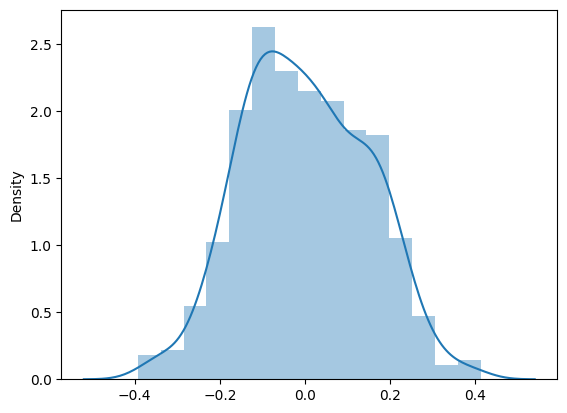

In [164]:
res = y_train -y_train_pred
sns.distplot(res)

In [165]:




### PREDICTION  and Evaluaion on the test set




In [166]:
# create the list of numeric variable
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
184,0,1,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,0,0,0,1,0,0,1,0
535,1,0,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,0,...,0,1,0,0,0,0,0,1,0,0
299,0,0,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,1,0,0,0,0,0,0,1,0
152,0,0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,0,...,0,0,1,0,0,0,0,1,0,0


In [167]:
df_test.describe()

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154,0.100000,...,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273,0.263636,0.245455,0.236364
std,0.500809,0.187620,0.233187,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163,0.300684,...,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248,0.441609,0.431338,0.425817
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [168]:
y_test = df_test.pop('cnt')
X_test = df_test

In [169]:
## add constant make prediction
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,temp,atemp,hum,windspeed,casual,registered,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
184,1.0,0,1,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0,...,0,0,0,0,0,1,0,0,1,0
535,1.0,1,0,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0,...,0,1,0,0,0,0,0,1,0,0
299,1.0,0,0,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0,...,0,0,1,0,0,1,0,0,0,1
221,1.0,0,0,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0,...,0,1,0,0,0,0,0,0,1,0
152,1.0,0,0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0,...,0,0,1,0,0,0,0,1,0,0


In [171]:
X_test_sm = X_test_sm.drop(['weathersit_2','mnth_4','mnth_2','season_4','mnth_9','mnth_5','weekday_3','atemp','mnth_6','mnth_12','mnth_7','temp','mnth_3','holiday','weekday_4','mnth_8','mnth_10','yr','weekday_1','weekday_2','registered','hum','weekday_5'],axis=1)

In [173]:
X_test_sm.head()

,const,windspeed,casual,mnth_11,weekday_6,weathersit_3,season_2,season_3
184,1.0,0.084219,0.933557,0,0,0,0,1
535,1.0,0.153728,0.265163,0,0,0,1,0
299,1.0,0.334206,0.072539,0,0,0,0,0
221,1.0,0.339570,0.268820,0,0,0,0,1
152,1.0,0.537414,0.223712,0,0,0,1,0


In [174]:
# predict
y_test_pred = lr_model.predict(X_test_sm)

In [176]:
# evaluate the model
r2_score(y_true=y_test, y_pred=y_test_pred)

0.5215602589403743